# Exploratory Data Analysis - House Prices
Here, in this notebook, we execute an Exploratory Data Analysis (EDA) over "[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)" dataset. Let's:
1. Understand the problem
2. Explore, clear, and prepare the data
3. Select and transform variables

**The problem to be solved**: create a Machine Learning model to predict the price of a house.

In [1]:
# loading packages
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

Let's take an inital look on **train** and **test** data.

In [2]:
train = pd.read_csv('../data/raw/train.csv')
print('train.csv::', train.shape)
train.head(3)

train.csv:: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


As the first step, let's see the data type in each column of the dataset.

In [3]:
# General statistics
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Descriptive statistics of train data.

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


At a glance, we can note that Id is irrelevant to predict SalePrice. **So let's remove the "Id" column**.

In [5]:
train.drop(columns=['Id'], inplace=True)

## Pandas Profiling

To automatize EDA, we can use [Pandas Profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/) package to generate a more complete and deep-in-analysis report from our dataset.

This report will serve as a reference for future data transformations and selection. 

In [6]:
profile = ProfileReport(train, title='Pandas Profiling Report', explorative=True)

Saving reports to HTML files.

In [7]:
#profile.to_file("../reports/pandas-profiling-raw.html")

## Data Cleaning

### Missing values

In Pandas-Profiling report, we can see a matrix of missing values. It seems that some columns have a lot of missing values. Let's count how many columns are being affected.

In [8]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print('Columns with missing values::', len(columns_with_miss))
columns_with_miss.sort_values(ascending=False)

Columns with missing values:: 19


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

From 80 columns, 19 have missing values. Yet, it's interesting to note that 4 of them almost have no values (PoolQC, MiscFeature, Alley and Fence) and it will be candidates to exclusion.

**TODO**: Exclude PoolQC, MiscFeature, Alley and Fence columns.

- PoolQC: Pool quality
- MiscFeature: Miscellaneous feature not covered in other categories
- Alley: Type of alley access to property
- Fence: Fence quality

In [9]:
# Removing columns
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

About FireplaceQu (690 missign values), it's necessary to consider that missing values hold information too. Here, NaN means No Fireplace. Maybe, it's unwise to remove this column.

- Ex Excellent - Exceptional Masonry Fireplace
- Gd Good - Masonry Fireplace in main level
- TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa Fair - Prefabricated Fireplace in basement
- Po Poor - Ben Franklin Stove
- NA No Fireplace

To explore the relation between FireplaceQu and SalePrice, let's encode categorical values to numeric. NA value will be 0, Poor will be 1, and so on.

In [10]:
train['FireplaceQu'].fillna(0, inplace=True)
train['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

With a barplot, we can note an increase in SalePrice when FireplaceQu is higher. Besides that, houses with Excellent fireplaces vary prices a lot. **Let's keep FireplaceQu**.

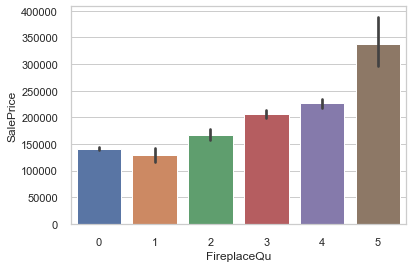

In [11]:
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=train)

### Missing values in numeric columns

Again from Pandas-Profiling reports, in LotFrontage (259 missign values), there are 17% of missing values in train_data and 15% in test_data. Moreover, LotFrontage (a numeric variable) has a good correlation with SalePrice. Let's analyze this columns with missing values using correlation against target variable (SalePrice):

In [12]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
train[c].corr()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.193458,0.070250,0.351799
MasVnrArea,0.193458,1.000000,0.252691,0.477493
GarageYrBlt,0.070250,0.252691,1.000000,0.486362
SalePrice,0.351799,0.477493,0.486362,1.000000


Note that LotFrontage, MasVnrArea, and GarageYrBlt have a positive correlation with SalePrice. Aren't strong, but exist. **By now, let's keep LotFrontage and the rest of the columns as well**. Even the categorical variables not analyzed yet! Our train data remains like that:

In [13]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print('Columns with missing values::', len(columns_with_miss))
columns_with_miss.sort_values(ascending=False)

Columns with missing values:: 14


LotFrontage     259
GarageCond       81
GarageQual       81
GarageFinish     81
GarageYrBlt      81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
dtype: int64

## Categorical variables

### Ordinal

Previously, we note that FireplaceQu (a categorical variable) measures fireplace quality using a ordinal system (Poor, Good, Excellent, etc) present in other variables too. Let's replicate such a method to transform these variables to numeric and see if it affect the target variable.

ExterQual: Evaluates the quality of the material on the exterior
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

ExterCond: Evaluates the present condition of the material on the exterior
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

BsmtQual: Evaluates the height of the basement
- Ex Excellent (100+ inches)
- Gd Good (90-99 inches)
- TA Typical (80-89 inches)
- Fa Fair (70-79 inches)
- Po Poor (<70 inches
- NA No Basement

BsmtCond: Evaluates the general condition of the basement
- Ex Excellent
- Gd Good
- TA Typical - slight dampness allowed
- Fa Fair - dampness or some cracking or settling
- Po Poor - Severe cracking, settling, or wetness
- NA No Basement

HeatingQC: Heating quality and condition
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

KitchenQual: Kitchen quality
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

GarageQual: Garage quality
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor
- NA No Garage

GarageCond: Garage condition
- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor
- NA No Garage

In [14]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ord_cols:
    train[col].fillna(0, inplace=True)
    train[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

Let's plot to undestand if this columns have useful information.

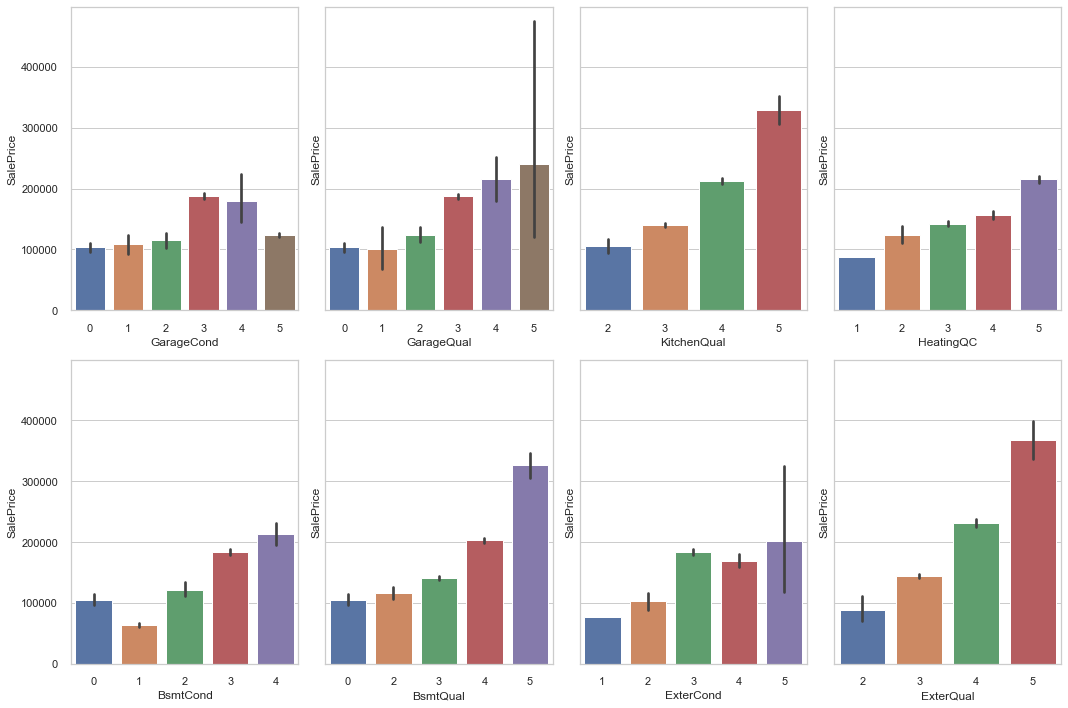

In [15]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
f, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)

for r in range(0, 2):
    for c in range(0, 4):
        sns.barplot(x=ord_cols.pop(), y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

As you can see, of course, better quality or condition of an aspect increases a house price. Let's check how our data look like now.

### Nominal

Other categorical variables seems don't follow this any clear ordering. So let's see how many values this columns can assume:

In [16]:
cols = train.columns
num_cols = train._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
print('Nominal columns::', len(nom_cols))

value_counts = {}
for c in nom_cols:
    value_counts[c] = len(train[c].value_counts())

sorted_value_counts = {k: v for k, v in sorted(value_counts.items(), key=lambda item: item[1])}
sorted_value_counts

Nominal columns:: 30


{'Utilities': 2,
 'CentralAir': 2,
 'Street': 2,
 'PavedDrive': 3,
 'LandSlope': 3,
 'GarageFinish': 3,
 'LotShape': 4,
 'LandContour': 4,
 'BsmtExposure': 4,
 'MasVnrType': 4,
 'BldgType': 5,
 'Electrical': 5,
 'MSZoning': 5,
 'LotConfig': 5,
 'GarageType': 6,
 'Heating': 6,
 'RoofStyle': 6,
 'Foundation': 6,
 'BsmtFinType2': 6,
 'SaleCondition': 6,
 'BsmtFinType1': 6,
 'Functional': 7,
 'Condition2': 8,
 'HouseStyle': 8,
 'RoofMatl': 8,
 'SaleType': 9,
 'Condition1': 9,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Neighborhood': 25}

Some categorical variables can assume several values. To simplify, let's analyze only variables that assume less than 6 values:

In [17]:
nom_cols_less_than_6 = []
for c in nom_cols:
    n_values = len(train[c].value_counts())
    if n_values < 7:
        nom_cols_less_than_6.append(c)

print('Nominal cols less than 6 values::', len(nom_cols_less_than_6))


Nominal cols less than 6 values:: 21


Plotting against SalePrice to have a better idea if it affect SalePrice:

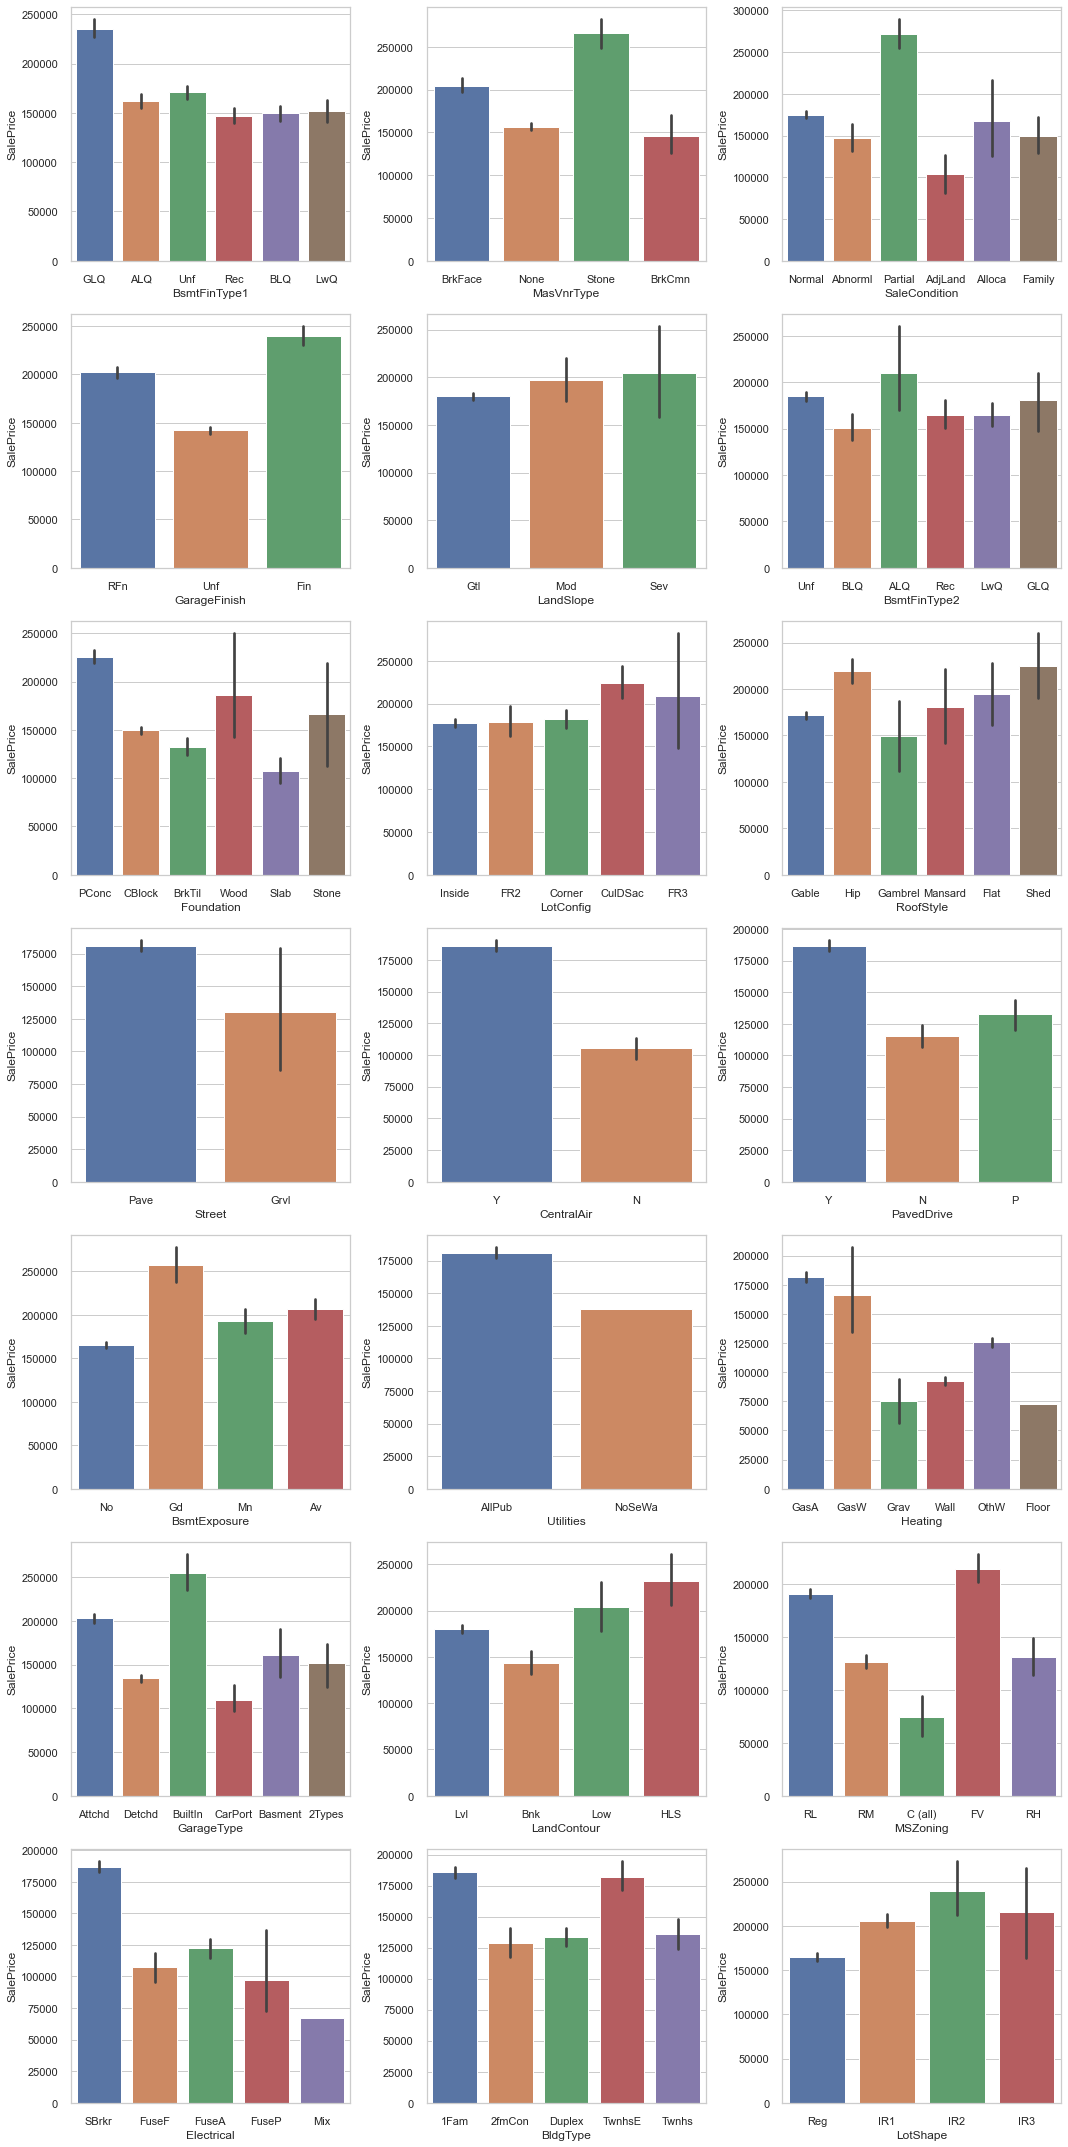

In [18]:
ncols = 3
nrows = math.ceil(len(nom_cols_less_than_6) / ncols)
f, axes = plt.subplots(nrows, ncols, figsize=(15, 30))

for r in range(0, nrows):
    for c in range(0, ncols):
        if not nom_cols_less_than_6:
            continue
        sns.barplot(x=nom_cols_less_than_6.pop(), y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

Note that several of these columns affect the target variable. So let's keep them.

### Zero values

As described in the Pandas-Profiling report there are a lot of zero values for some variables, let's check that.

In [19]:
train.isin([0]).sum().sort_values(ascending=False).head(25)

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
FireplaceQu       690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageCond         81
GarageCars         81
GarageArea         81
GarageQual         81
TotalBsmtSF        37
BsmtCond           37
BsmtQual           37
dtype: int64

Other columns have some many zero values, but it holds information like BsmtHalfBath and LowQualFinSF. By now, let's keep then.

## Outliers

Another approach, it's to detect if in numeric variables we have many outliers.

In [20]:
# Get only numerical columns
numerical_columns = list(train.dtypes[train.dtypes == 'int64'].index)
len(numerical_columns)

43

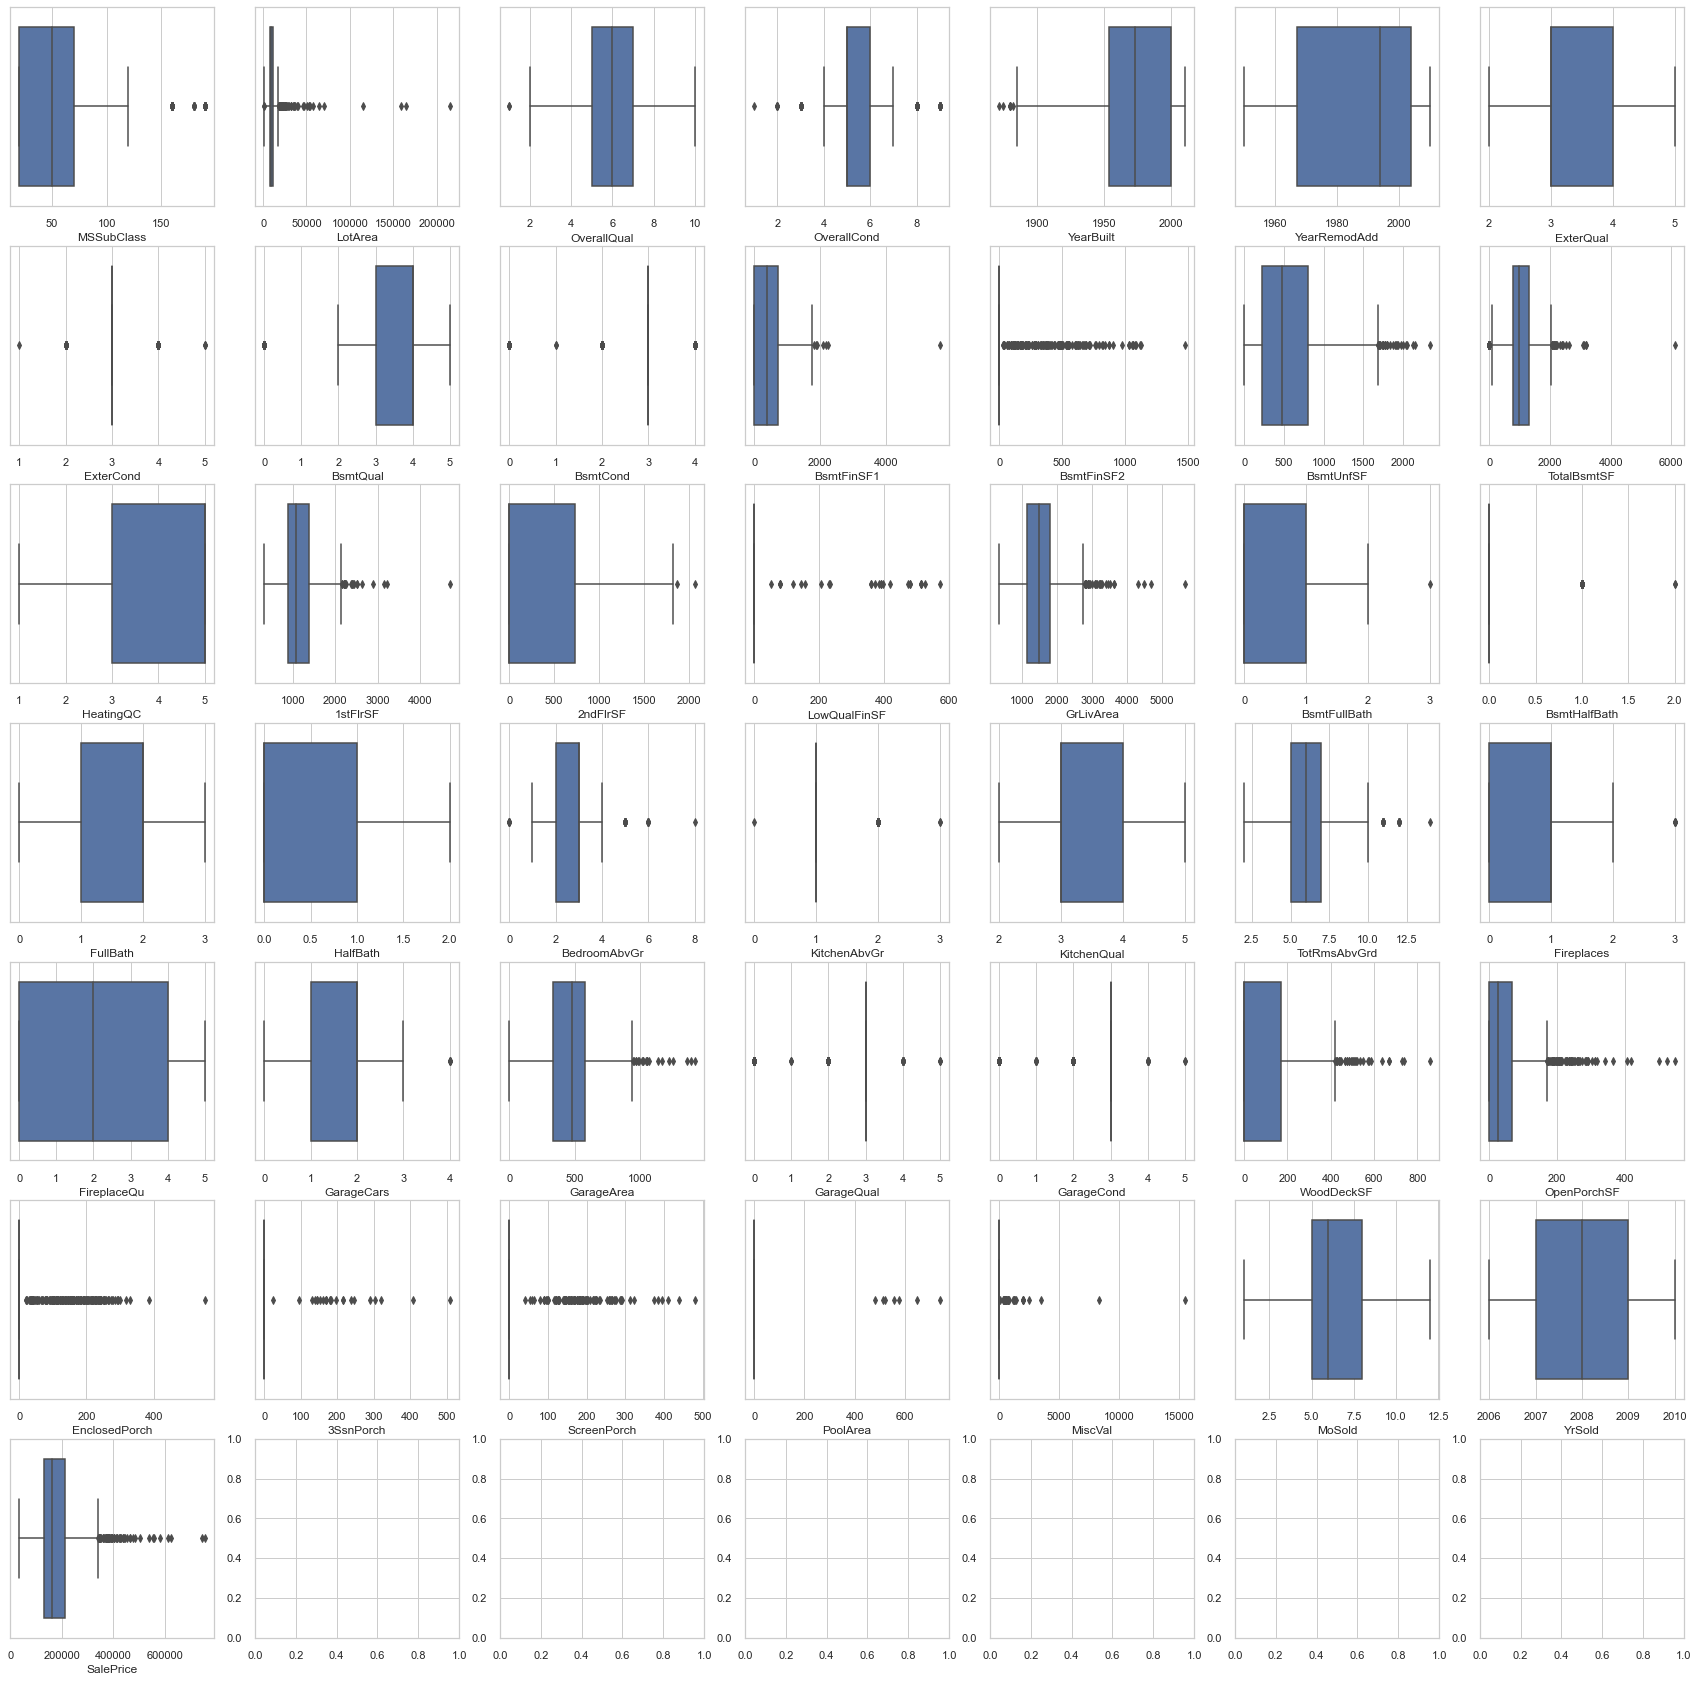

In [22]:
# Create the plot grid
rows = 7
columns = 7

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=train[column], ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

There are a lot of outliers in the dataset. But, if we check the data description file, we see that, actually, some numerical variables, are categorical variables that were saved (codified) as numbers. So, some of these data that seem to have outliers, but, actually they are categorical data with only one example of some category.

For now, we will not handle these outliers.

## Only to keep equal to pre_processing.py

In [24]:
# Removes columns with missing values issues
cols_to_be_removed = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
train.drop(columns=cols_to_be_removed, inplace=True)
# Fills NA where incorrectly pandas placed NaN
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    train[c].fillna('NA', inplace=True)
# Fills None where incorrectly pandas placed NaN
train['MasVnrType'].fillna('None', inplace=True)
# Inputs more frequent value
train['Electrical'].fillna('SBrkr', inplace=True)

## Saving cleaned data

Let's see how cleaned data looks like:

In [25]:
print('train.csv::', train.shape)
#train.head(3)
cols = ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
len(cols)
train.isna().sum().sort_values(ascending=False)

train.csv:: (1460, 73)


SalePrice       0
Heating         0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
MSSubClass      0
Length: 73, dtype: int64

Now, let's save the cleaned data.

In [ ]:
train.to_csv('../data/processed/train-cleaned.csv')

## Conclusions

What do we have been done until now?
- Data Cleaning
    - Removed columns:
        - 'Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea'
    - Transformed columns (ordinal variables):
        - 'FireplaceQu', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond'. NaN -> 0, Po -> 1, Gd -> 2, etc.
    -Filled with NA:
        - 'GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1'
    - Filled with None:
        - 'MasVnrType'
    - Imputed with most frequent value:
        - 'Electrical'